In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import geopandas as gpd

In [2]:
palette = ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"]
sns.set(rc={"axes.facecolor":"#e6e6e6","figure.facecolor":"#f5f5f5"})
cmap = colors.ListedColormap( ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"])

In [3]:
# Load the dataset
df = pd.read_csv('/content/crime_in_Washington.csv')
# Display the first 5 rows of the dataset
df.head()

,Unnamed: 0,longitude,latitude,ccn,report_date,shift,method,offense,block,xblock,...,block_group,census_tract,voting_precinct,latitude.1,longitude.1,bid,start_date,end_date,location,offense_group
0,0,-76.988311,38.900209,23151247,2023/09/13 16:39:06+00,DAY,OTHERS,MOTOR VEHICLE THEFT,H STREET NE AND 13TH STREET NE,401014.179999,...,008410 1,8410.0,Precinct 82,38.900201,-76.988308,NaN,2023/09/13 15:15:00+00,2023/09/13 16:38:00+00,latitude 38.900209\nlatitude 38.900201\n...,property
1,1,-76.966731,38.876371,23050047,2023/04/01 11:14:02+00,DAY,OTHERS,THEFT F/AUTO,2900 - 2943 BLOCK OF NELSON PLACE SE,402887.000000,...,007709 1,7709.0,Precinct 111,38.876364,-76.966729,NaN,2023/04/01 10:42:00+00,2023/04/01 11:00:00+00,latitude 38.876371\nlatitude 38.876364\n...,property
2,2,-77.031962,38.908045,23022454,2023/02/10 20:12:13+00,EVENING,OTHERS,ROBBERY,1300 - 1399 BLOCK OF 14TH STREET NW,397228.000000,...,005003 1,5003.0,Precinct 17,38.908037,-77.031960,NaN,2023/02/10 18:46:00+00,2023/02/10 18:56:00+00,latitude 38.908045\nlatitude 38.908037\n...,violent
3,3,-77.061651,38.948787,23022494,2023/02/10 21:17:57+00,EVENING,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF 30TH STREET NW,394656.000000,...,001301 1,1301.0,Precinct 138,38.948779,-77.061649,NaN,2023/02/09 11:00:00+00,2023/02/10 19:00:00+00,latitude 38.948787\nlatitude 38.948779\n...,property
4,4,-76.946967,38.893357,23127098,2023/08/04 19:00:04+00,DAY,OTHERS,THEFT/OTHER,300 - 499 BLOCK OF 40TH STREET NE,404600.899906,...,009603 2,9603.0,Precinct 102,38.893349,-76.946965,NaN,2023/08/04 18:40:00+00,2023/08/04 18:53:00+00,latitude 38.893357\nlatitude 38.893349\n...,property


In [5]:
# Summary statistics
df.describe()

,Unnamed: 0,longitude,latitude,ccn,xblock,yblock,ward,district,psa,census_tract,latitude.1,longitude.1
count,34925.00000,34925.000000,34925.000000,3.492500e+04,34925.000000,34925.000000,34920.000000,34925.000000,34611.000000,34909.000000,34925.000000,34925.000000
mean,16791.39602,-77.007964,38.907408,2.314931e+07,399310.051233,137727.356940,4.426145,4.638082,379.703042,7665.593772,38.907400,-77.007961
std,10059.79572,0.034752,0.030486,4.279972e+05,3014.061172,3384.338693,2.355388,1.667562,185.153677,36214.278256,0.030486,0.034752
min,0.00000,-77.112318,38.814667,5.008224e+06,390262.040000,127432.000000,1.000000,1.000000,101.000000,101.000000,38.814659,-77.112316
25%,8047.00000,-77.031494,38.892873,2.306224e+07,397269.170000,136114.000000,2.000000,4.000000,208.000000,3702.000000,38.892865,-77.031492
50%,16778.00000,-77.010662,38.908484,2.311977e+07,399075.000000,137846.690000,5.000000,5.000000,401.000000,7202.000000,38.908476,-77.010659
75%,25509.00000,-76.986857,38.925441,2.317615e+07,401141.150000,139731.000000,6.000000,6.000000,506.000000,9102.000000,38.925433,-76.986855
max,34240.00000,-76.910014,38.993573,9.225116e+07,407806.750917,147292.580000,8.000000,7.000000,708.000000,980000.000000,38.993565,-76.910012


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34925 entries, 0 to 34924
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            34925 non-null  int64  
 1   longitude             34925 non-null  float64
 2   latitude              34925 non-null  float64
 3   ccn                   34925 non-null  int64  
 4   report_date           34925 non-null  object 
 5   shift                 34925 non-null  object 
 6   method                34925 non-null  object 
 7   offense               34925 non-null  object 
 8   block                 34925 non-null  object 
 9   xblock                34925 non-null  float64
 10  yblock                34925 non-null  float64
 11  ward                  34920 non-null  float64
 12  anc                   34920 non-null  object 
 13  district              34925 non-null  float64
 14  psa                   34611 non-null  float64
 15  neighborhood_cluste

<ipython-input-7-38ade0630abd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='method', palette = palette)
<ipython-input-7-38ade0630abd>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=df, x='method', palette = palette)


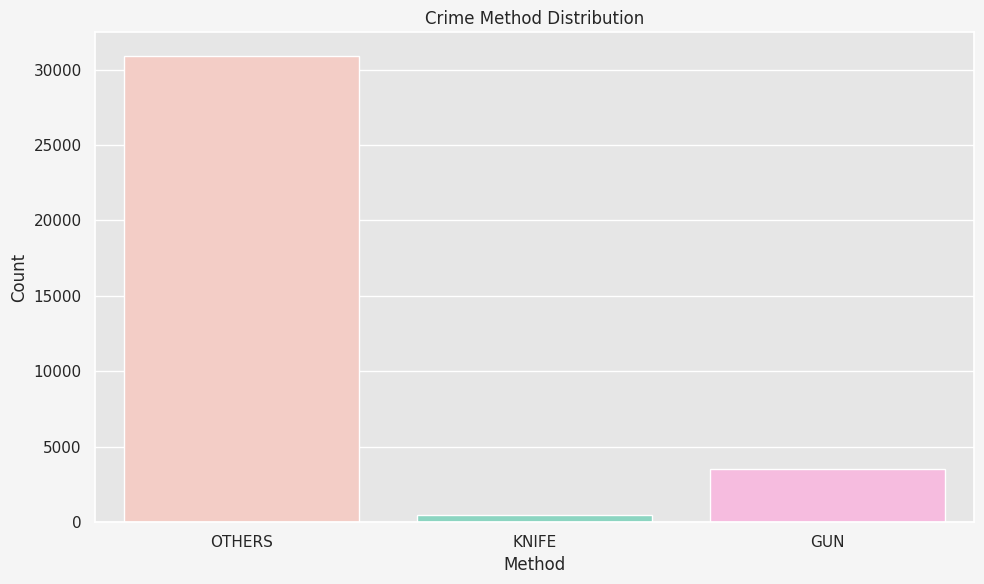

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='method', palette = palette)
plt.title('Crime Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.tight_layout()

<ipython-input-8-fbcd601a5203>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='offense',palette=palette, order=df['offense'].value_counts().index)
<ipython-input-8-fbcd601a5203>:2: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='offense',palette=palette, order=df['offense'].value_counts().index)


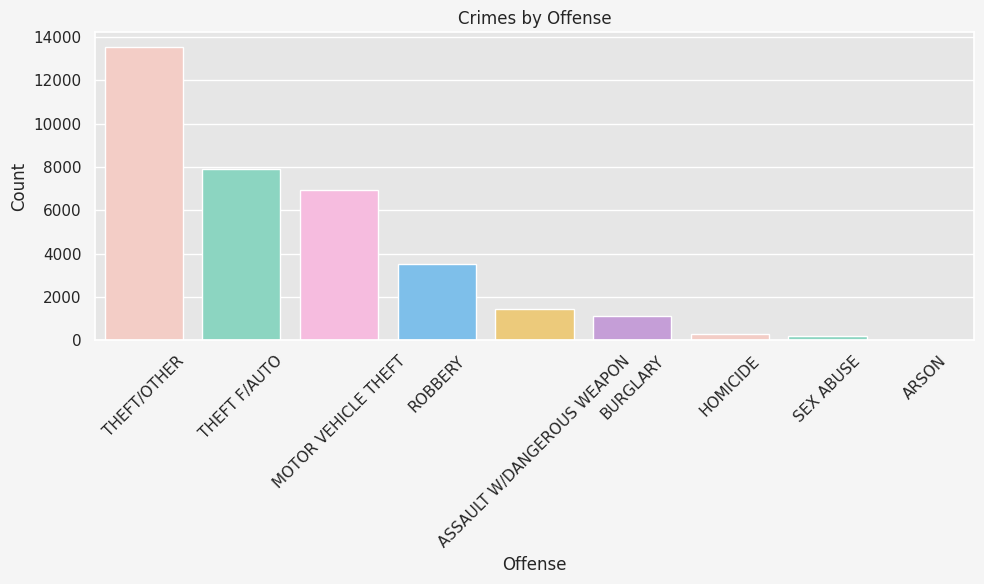

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='offense',palette=palette, order=df['offense'].value_counts().index)
plt.title('Crimes by Offense')
plt.xlabel('Offense')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

<ipython-input-9-bd4a3eda5e97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='district',palette=palette)
<ipython-input-9-bd4a3eda5e97>:3: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='district',palette=palette)


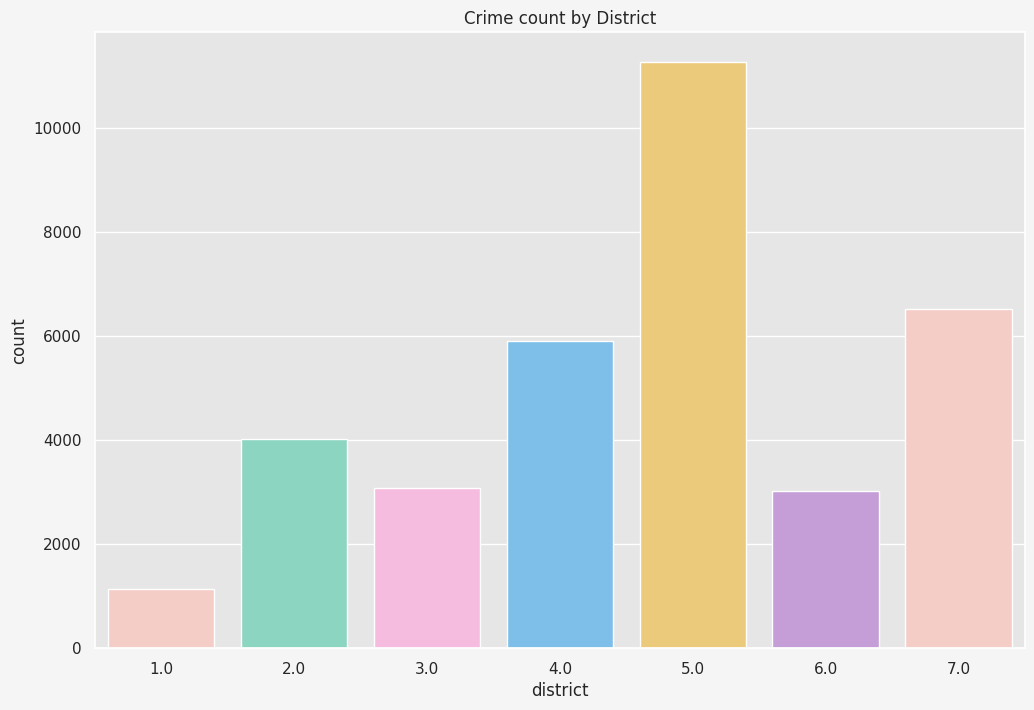

In [9]:
# Exploring crime count by district
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='district',palette=palette)
plt.title("Crime count by District")
plt.show()

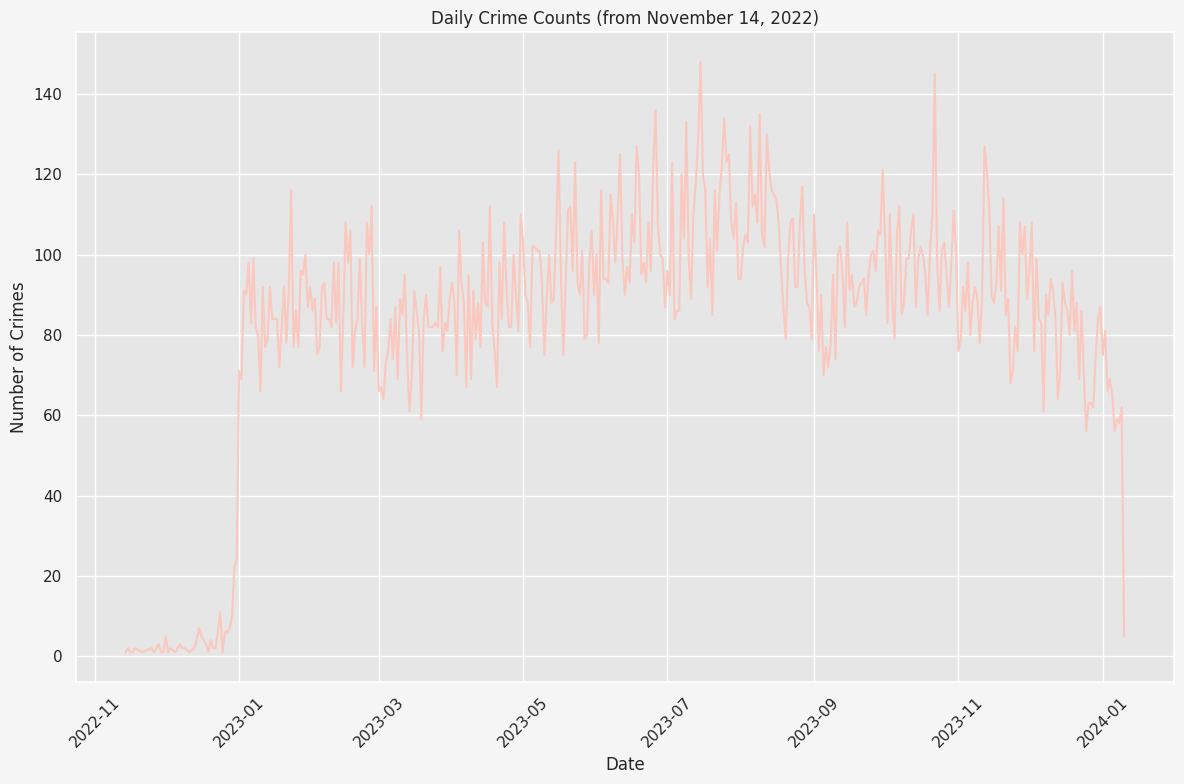

In [22]:
# Filter data from November 14, 2022
df_filtered = df[df['start_date'] >= '2022-11-14']

# Recalculate daily counts
daily_counts_filtered = df_filtered['start_date'].dt.date.value_counts().sort_index()

# Plot the updated daily crime counts
plt.figure(figsize=(12, 8))
sns.lineplot(x=daily_counts_filtered.index, y=daily_counts_filtered.values, color=palette[0])
plt.title('Daily Crime Counts (from November 14, 2022)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

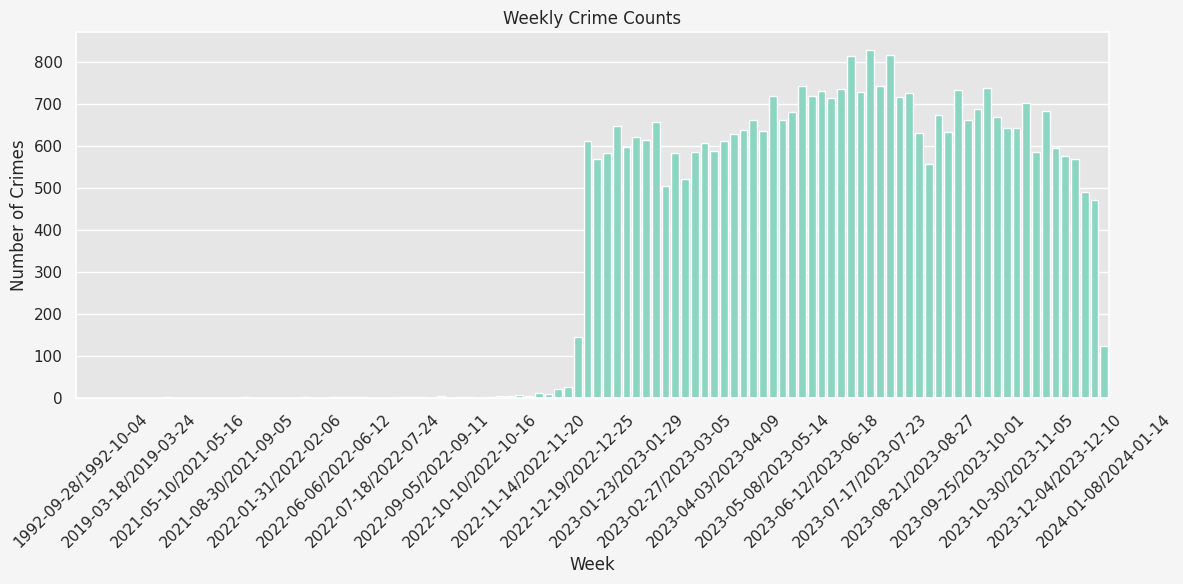

In [30]:
# Weekly
plt.figure(figsize=(12,6))
sns.barplot(x=weekly_counts.index.astype(str), y=weekly_counts.values, color=palette[1])
locs, labels = plt.xticks()
plt.xticks(locs[::5], weekly_counts.index.astype(str)[::5], rotation=45)

plt.title('Weekly Crime Counts')
plt.xlabel('Week')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

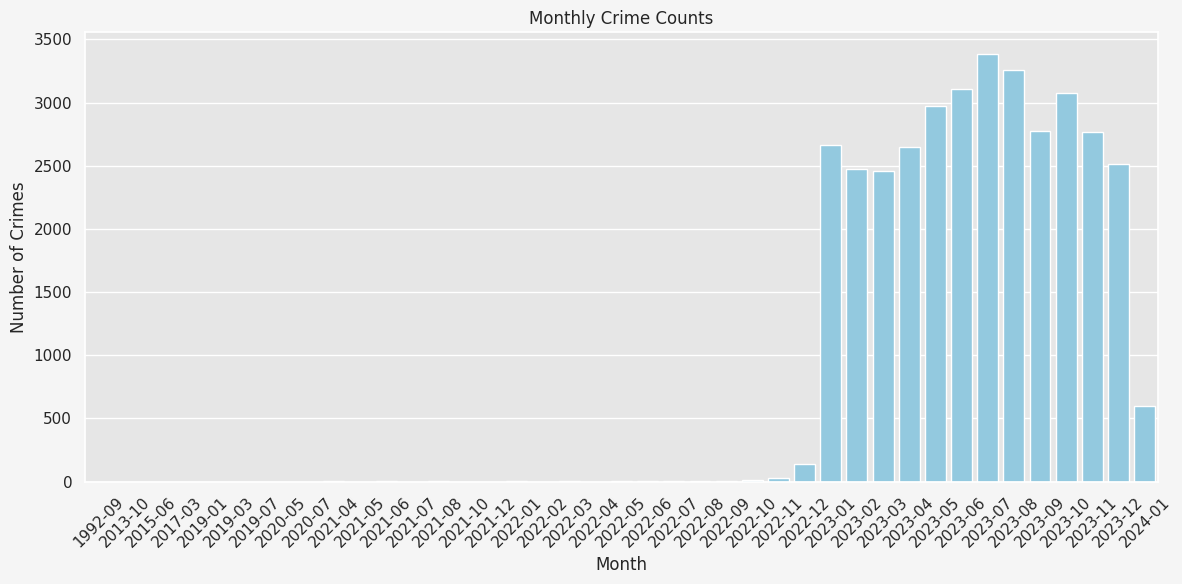

In [38]:
  # Monthly
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values,color='skyblue')
plt.title('Monthly Crime Counts')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-13-f4bfe7aa7142>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days, y=weekday_counts, palette=palette)
<ipython-input-13-f4bfe7aa7142>:6: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=days, y=weekday_counts, palette=palette)


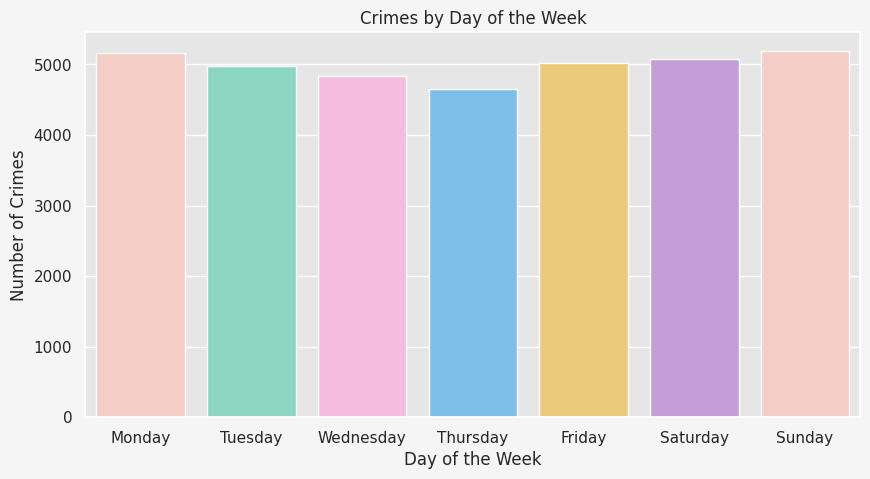

In [13]:
df['day_of_week'] = df['start_date'].dt.dayofweek
weekday_counts = df['day_of_week'].value_counts().sort_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.barplot(x=days, y=weekday_counts, palette=palette)
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

<ipython-input-14-c396171a6a11>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts, palette=palette)
<ipython-input-14-c396171a6a11>:5: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=hourly_counts.index, y=hourly_counts, palette=palette)


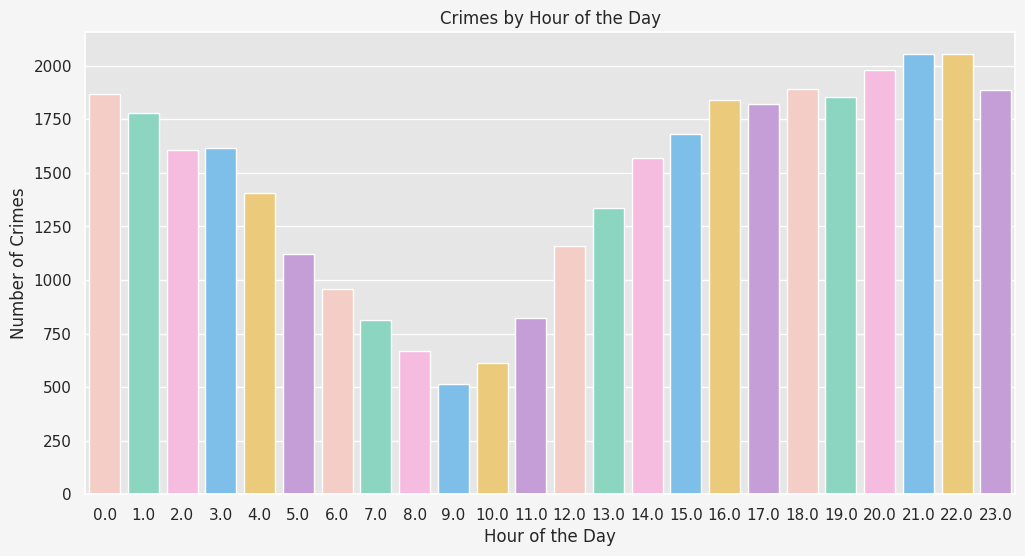

In [14]:
df['hour'] = df['start_date'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=hourly_counts.index, y=hourly_counts, palette=palette)
plt.title('Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(24), rotation=0)
plt.show()

In [15]:
# Mean latitude and longitude
mean_latitude = df['latitude'].mean()
mean_longitude = df['longitude'].mean()

# Total number of records
total_records = len(df)

# Group by offense group and count occurrences
offense_counts = df['offense_group'].value_counts()

# Print the results
print(f"Mean Latitude: {mean_latitude:.6f}")
print(f"Mean Longitude: {mean_longitude:.6f}")
print(f"Total Records: {total_records}")
print("Offense Counts:")
print(offense_counts)

Mean Latitude: 38.907408
Mean Longitude: -77.007964
Total Records: 34925
Offense Counts:
property    29515
violent      5410
Name: offense_group, dtype: int64


In [23]:
# Buffer around each point (e.g., 100 meters)
gdf['buffered_geometry'] = gdf.buffer(0.001)

# Calculate area of each buffered geometry
gdf['buffer_area'] = gdf['buffered_geometry'].area

# Print the first few rows
gdf[['offense_group', 'buffer_area']]

,offense_group,buffer_area
0,property,0.000003
1,property,0.000003
2,violent,0.000003
3,property,0.000003
4,property,0.000003
...,...,...
34920,property,0.000003
34921,violent,0.000003
34922,property,0.000003
34923,property,0.000003


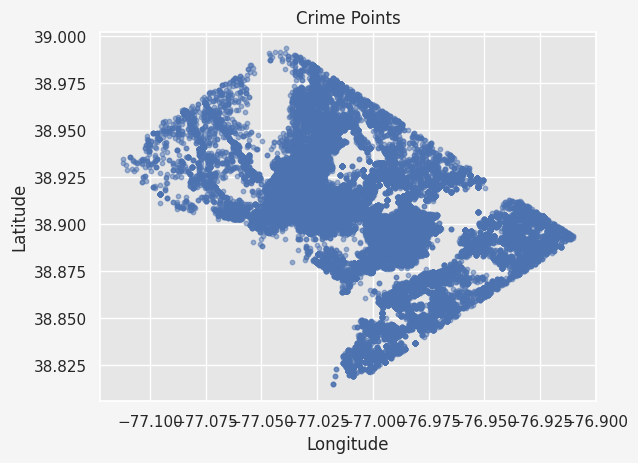

In [17]:
plt.scatter(df['longitude'], df['latitude'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Points')
plt.show()